In [19]:
!pip install numpy pandas
!pip install datasets
!pip install transformers
!pip install tensorflow
!pip install wordcloud
!pip install nltk
!pip install matplotlib
!pip install textblob
!pip install textstat
!pip install gensim 
!pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --------- ------------------------------ 0.6/2.6 MB 12.4 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.6 MB 15.6 MB/s eta 0:00:01
   ---------------------------------- ----- 2.2/2.6 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 15.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.6 MB 17.9 MB/s eta 0:00:01
   ------ --------------------------------- 1.8/10.6 MB 18.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.6 MB 18.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 15.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.6 MB 13.7 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/10.6 MB 14.1 MB/s eta 0:00:01
   ------------------ --------------------- 4.9/10.6 MB 15.0 MB/s eta 0:00:01
   ----

In [20]:
from datasets import load_dataset
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from textblob import TextBlob
import textstat
from nltk import ngrams
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nabil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from datasets import load_dataset

# Load the IMDb dataset
dataset = load_dataset("imdb")

# Dataset information
print(dataset)

# Get a sample of the dataset
testing = dataset['train'][0]
print(testing)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and

In [4]:
# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
text     0
label    0
dtype: int64


In [5]:
# Analyze label distribution
print("\nLabel distribution:")
print(df['label'].value_counts())


Label distribution:
label
0    12500
1    12500
Name: count, dtype: int64


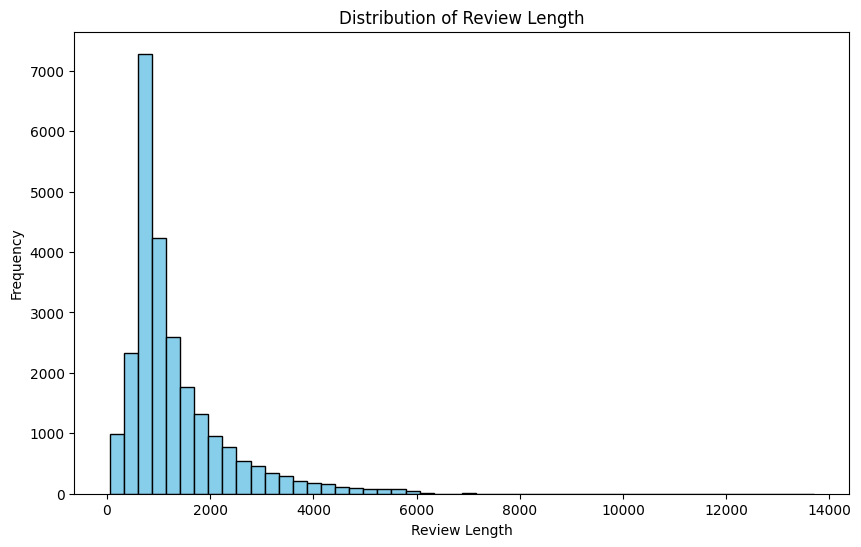

In [6]:
# Distribution of Review Length, Histogram to understand the length distribution of reviews
df['review_length'] = df['text'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Length')
plt.show()

In [7]:
# Analyze average length of reviews
df['review_length'] = df['text'].apply(len)
average_review_length = df['review_length'].mean()
print(f"Average length of reviews: {average_review_length:.2f} characters")

Average length of reviews: 1325.07 characters


In [8]:
# Get the set of English words
english_words = set(nltk_words.words())

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Combine all text into a single string
all_text = ' '.join(df['text'])

# Tokenize the text
tokens = word_tokenize(all_text)

# Remove stop words and non-English words
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.lower() in english_words]

# Count the frequency of each word
word_counts = Counter(filtered_tokens)

# Get the top 20 most common words
top_20_words = word_counts.most_common(20)

# Print the top 10 most common words in a formatted way
for word, frequency in top_20_words:
    print(f"Word: {word}, Frequency: {frequency}")

Word: movie, Frequency: 41963
Word: film, Frequency: 38306
Word: one, Frequency: 23564
Word: like, Frequency: 18972
Word: good, Frequency: 14027
Word: would, Frequency: 13222
Word: time, Frequency: 11624
Word: really, Frequency: 11305
Word: story, Frequency: 11176
Word: even, Frequency: 10987
Word: see, Frequency: 10907
Word: much, Frequency: 9314
Word: could, Frequency: 9203
Word: get, Frequency: 9018
Word: people, Frequency: 8681
Word: bad, Frequency: 8514
Word: great, Frequency: 8303
Word: well, Frequency: 7960
Word: made, Frequency: 7909
Word: first, Frequency: 7901


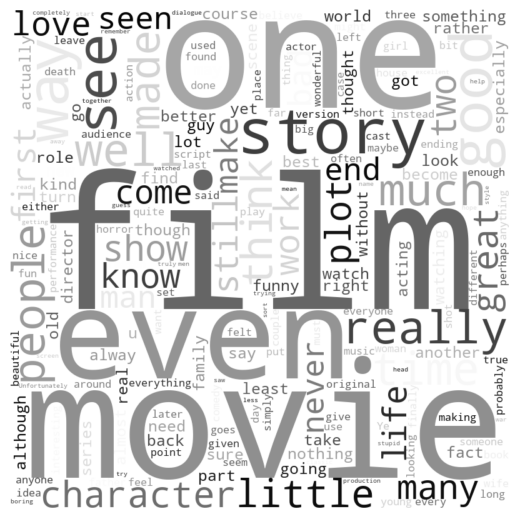

In [9]:
# Word cloud, words appearing more are bigger, whereas words appearing less in the corpus are smaller in size. 
combined_text = ' '.join(filtered_tokens)
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='binary', contour_color='black', contour_width=0).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(5, 5), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

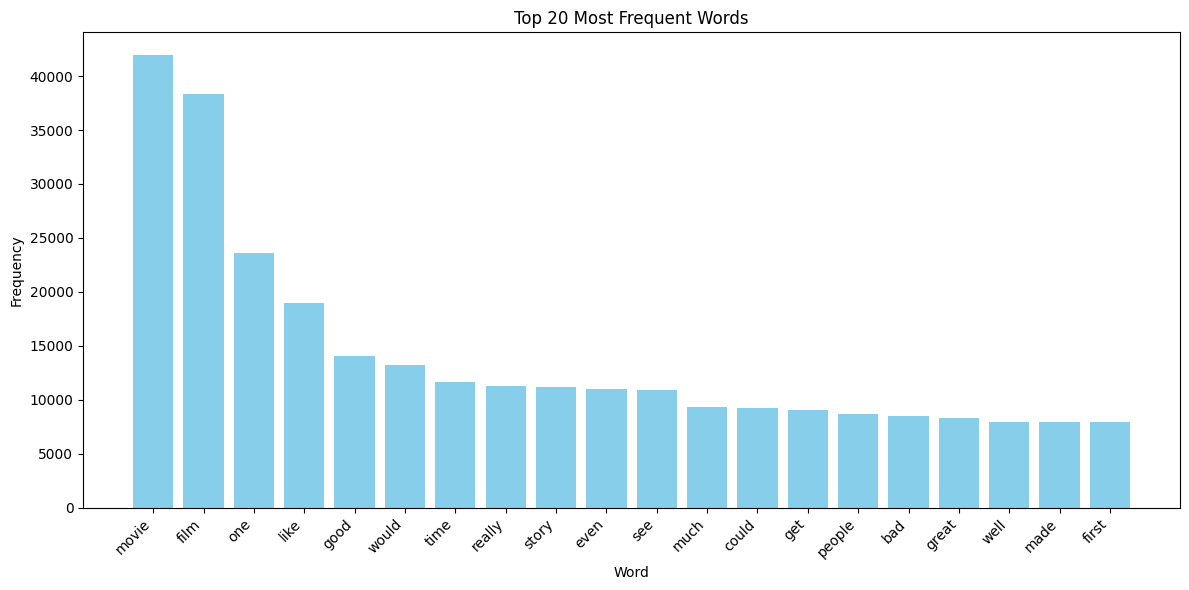

In [10]:
# Let's make it beautiful and check it with a bar graph
word_freq = Counter(combined_text.split())
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort words by frequency
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot word frequency
plt.figure(figsize=(12, 6))
top_words = 20  # Number of top words to display
plt.bar(word_freq_df['Word'][:top_words], word_freq_df['Frequency'][:top_words], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Sentiment analysis on the 'text' column using Textblob
# Function to calculate sentiment polarity using TextBlob
def calculate_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Calculate sentiment polarity for each review
df['polarity'] = df['text'].apply(calculate_polarity)

# Separate positive and negative reviews
positive_reviews = df[df['label'] == 1]
negative_reviews = df[df['label'] == 0]

# Calculate average polarity for positive and negative reviews
avg_positive_polarity = positive_reviews['polarity'].mean()
avg_negative_polarity = negative_reviews['polarity'].mean()

In [13]:
# Average polarities for both types of reviews
print("Average polarity for positive reviews:", avg_positive_polarity)
print("Average polarity for negative reviews:", avg_negative_polarity)

Average polarity for positive reviews: 0.19304342622068013
Average polarity for negative reviews: 0.013336767750285652


In [12]:
# Let's peek more into it to see which ones have the most and least polarities
# Get 10 reviews with highest polarity
top_positive_reviews = df.nlargest(10, 'polarity')[['text', 'polarity']]
print("Top 10 reviews with highest polarity:")
for review, polarity in top_positive_reviews.values:
    print(f"Review: {review}\nPolarity: {polarity}\n")
# Get 10 reviews with lowest polarity
top_negative_reviews = df.nsmallest(10, 'polarity')[['text', 'polarity']]
print("\nTOP 10 reviews with lowest polarity:")
for review, polarity in top_negative_reviews.values:
    print(f"Review: {review}\nPolarity: {polarity}\n")

Top 10 reviews with highest polarity:
Review: Smallville episode Justice is the best episode of Smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! It's my favorite episode of Smallville! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !
Polarity: 1.0

Review: Smallville episode Justice is the best episode of Smallville ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! !

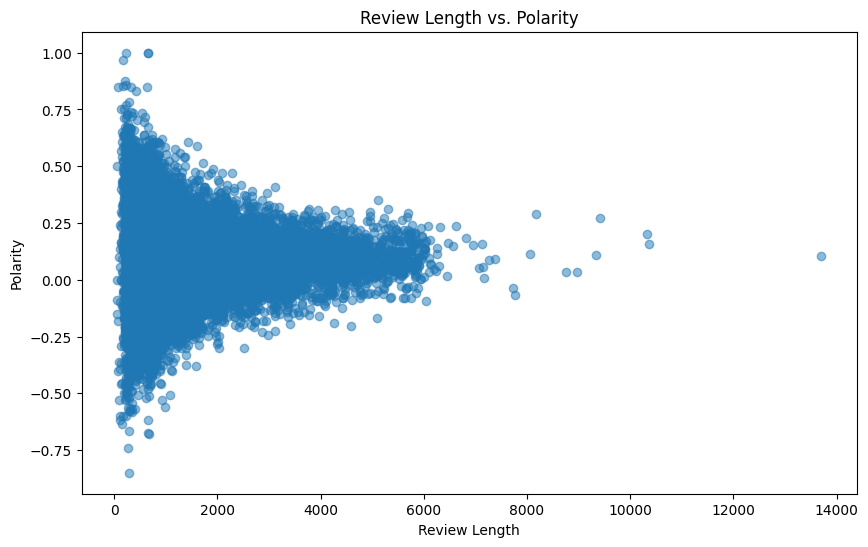

In [15]:
# Scatter Plot of Review Length vs. Polarity
plt.figure(figsize=(10, 6))
plt.scatter(df['review_length'], df['polarity'], alpha=0.5)
plt.xlabel('Review Length')
plt.ylabel('Polarity')
plt.title('Review Length vs. Polarity')
plt.show()

In [13]:
# Calculate readability scores for each review
df['flesch_reading_ease'] = df['text'].apply(lambda x: textstat.flesch_reading_ease(x))
df['smog_index'] = df['text'].apply(lambda x: textstat.smog_index(x))
df['flesch_kincaid_grade'] = df['text'].apply(lambda x: textstat.flesch_kincaid_grade(x))
df['coleman_liau_index'] = df['text'].apply(lambda x: textstat.coleman_liau_index(x))
df['automated_readability_index'] = df['text'].apply(lambda x: textstat.automated_readability_index(x))
df['dale_chall_readability_score'] = df['text'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['difficult_words'] = df['text'].apply(lambda x: textstat.difficult_words(x))

# Calculate average readability scores for all reviews
avg_readability_scores = df[['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade',
                              'coleman_liau_index', 'automated_readability_index',
                              'dale_chall_readability_score', 'difficult_words']].mean()

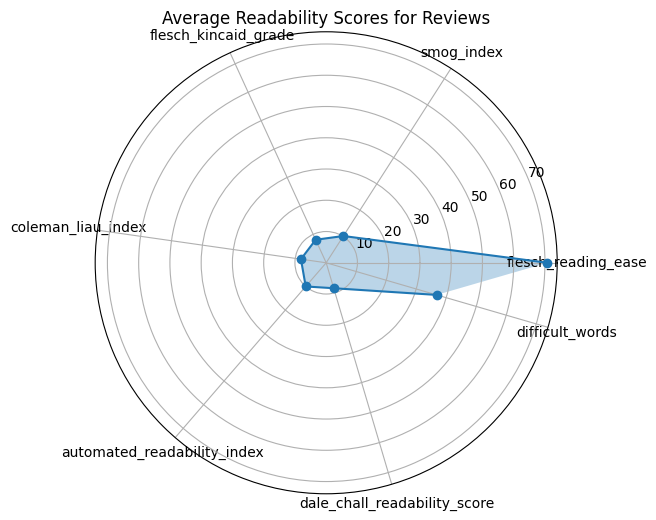

In [17]:
# Prepare data for spider chart
categories = avg_readability_scores.index
values = avg_readability_scores.values.tolist()

# Create spider chart
plt.figure(figsize=(10, 6))
plt.subplot(polar=True)
plt.plot(categories, values, marker='o')
plt.fill(categories, values, alpha=0.3)
plt.title('Average Readability Scores for Reviews')
plt.show()

In [16]:
# N-gram occurences of words in the dataset, Tri-grams can be done too.
# Specifying the n-gram range
n = 2  

# Generate n-grams
ngrams_list = list(ngrams(filtered_tokens, n))

# Count the occurrences of each n-gram
ngrams_freq = Counter(ngrams_list)

# Sort the n-grams by frequency
sorted_ngrams_freq = dict(sorted(ngrams_freq.items(), key=lambda x: x[1], reverse=True))

# Top 20 most common n-grams
print(f"Top 20 most common {n}-grams:")
for ngram, freq in list(sorted_ngrams_freq.items())[:20]:
    print(f"{ngram}: {freq}")

Top 20 most common 2-grams:
('ever', 'seen'): 1251
('special', 'effects'): 1037
('one', 'best'): 883
('even', 'though'): 798
('good', 'movie'): 758
('see', 'movie'): 753
('waste', 'time'): 750
('New', 'York'): 708
('much', 'better'): 692
('movie', 'like'): 678
('first', 'time'): 671
('watch', 'movie'): 624
('look', 'like'): 607
('movie', 'ever'): 589
('movie', 'one'): 589
('low', 'budget'): 565
('pretty', 'much'): 551
('movie', 'really'): 544
('main', 'character'): 543
('movie', 'would'): 539


In [23]:
# Topic Modelling using the LDA model to find the main topics that occur in the data
# Tokenize the text into words
texts = [doc.split() for doc in df['text']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Create a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15)

# Visualize the topics
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_visualization)